In [319]:
'''
Trying to fit ferric floride (at short distance run for now), fit isn't working, unsure about peak intensity or QS.
Yttrium orthoferrite - Temp scaling - this is all from when the oven wasn't working so is commented out.

Magnetite - complicated double set of 6 peaks, not fit yet
Hematite - nice fit with fitter with QS
'''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import spinmob as s

In [385]:
'''
giving a fitter, returns an array of the fitted lorentzian1 parameters and errors in 2D array
arg: my_fitter = fit, x = integer value offset

'''
def getFits_lor(my_fitter, x):
    
    di = my_fitter.get_fit_results()
    results = [di[key] for key in di.keys()]
    
    center = [results[0+8*x], results[1+8*x]]
    dist = [results[2+8*x], results[3+8*x]]
    gamma = [results[4+8*x], results[5+8*x]]
    A = [results[6+8*x], results[7+8*x]]

    return [center, dist, gamma, A]

"""
Takes array of channels, and m, b of linear function
Returns array of velocities [mmsec]
"""
def chan_to_velo(channels, m, b):
    v = [m[0]*c + b[0] for c in channels]
    return v

"""
"""
def average(a, b, offset):
    
    center = (a[0] - b[0]) / 2.0 + offset[0]
    err = np.sqrt((np.sqrt((a[1])**2 + (b[1])**2)*0.5)**2+(offset[1])**2)
    
    return [center, err]

def lorentzian6const(E, center, dist, gamma, A, center_2, dist_2, gamma_2, A_2, center_3, dist_3, gamma_3, A_3, b):

    denom = (E-(center - dist))**2 + (gamma/2)**2
    denom_2 = (E-(center_2 - dist_2))**2 + (gamma_2/2)**2
    denom_3 = (E-(center_3 - dist_3))**2 + (gamma_3/2)**2
    denom_4 = (E-(center_3 + dist_3))**2 + (gamma_3/2)**2
    denom_5 = (E-(center_2 + dist_2))**2 + (gamma_2/2)**2
    denom_6 = (E-(center + dist))**2 + (gamma/2)**2
    
    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + A_3*gamma_3**2/denom_3 + A_3*gamma_3**2/denom_4 + A_2*gamma_2**2/denom_5 + A*gamma**2/denom_6 + b

def lorentzian4const(E, center, dist, gamma, A, center_2, dist_2, gamma_2, A_2, b):

    denom = (E-(center - dist))**2 + (gamma/2)**2
    denom_2 = (E-(center_2 - dist_2))**2 + (gamma_2/2)**2
    denom_5 = (E-(center_2 + dist_2))**2 + (gamma_2/2)**2
    denom_6 = (E-(center + dist))**2 + (gamma/2)**2
    
    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + A_2*gamma_2**2/denom_5 + A*gamma**2/denom_6 + b

'''

'''
def lorentzian6Magt(E, I, B_hf, IS, gamma, b):
    
    cal3 = 5.3115 #0.00055
    cal2 = 3.0639 #0.0006
    cal1 = 0.831 #0.0010

    denom = (E-( (-cal3/33.0)*B_hf + IS ) )**2 + (gamma/2)**2
    denom_2 = (E-( (-cal2/33.0)*B_hf + IS ) )**2 + (gamma/2)**2
    denom_3 = (E-( (-cal1/33.0)*B_hf + IS ) )**2 + (gamma/2)**2
    denom_4 = (E-( (cal1/33.0)*B_hf + IS ) )**2 + (gamma/2)**2
    denom_5 = (E-( (cal2/33.0)*B_hf + IS ))**2 + (gamma/2)**2
    denom_6 = (E-( (cal3/33.0)*B_hf + IS ) )**2 + (gamma/2)**2
    
    return 3*I*gamma**2/denom + 2*I*gamma**2/denom_2 + I*gamma**2/denom_3 + I*gamma**2/denom_4 + 2*I*gamma**2/denom_5 + 3*I*gamma**2/denom_6 + b
    
def lorentzian6MagtQS(E, I, B_hf, IS, gamma, QS, b):
    
    cal3 = 5.3115 #0.00055
    cal2 = 3.0639 #0.0006
    cal1 = 0.831 #0.0010

    denom = (E-( (-cal3/33.0)*B_hf + IS +QS) )**2 + (gamma/2)**2
    denom_2 = (E-( (-cal2/33.0)*B_hf + IS -QS) )**2 + (gamma/2)**2
    denom_3 = (E-( (-cal1/33.0)*B_hf + IS -QS) )**2 + (gamma/2)**2
    denom_4 = (E-( (cal1/33.0)*B_hf + IS -QS) )**2 + (gamma/2)**2
    denom_5 = (E-( (cal2/33.0)*B_hf + IS -QS))**2 + (gamma/2)**2
    denom_6 = (E-( (cal3/33.0)*B_hf + IS +QS) )**2 + (gamma/2)**2
    
    return 3*I*gamma**2/denom + 2*I*gamma**2/denom_2 + I*gamma**2/denom_3 + I*gamma**2/denom_4 + 2*I*gamma**2/denom_5 + 3*I*gamma**2/denom_6 + b

def lorentzian6MagtQS_115(E, I, B_hf, IS, gamma, QS, b):
    
    cal3 = 5.3115 #0.00055
    cal2 = 3.0639 #0.0006
    cal1 = 0.831 #0.0010

    denom = (E-( (-cal3/33.0)*B_hf + IS +QS) )**2 + (gamma/2)**2
    denom_2 = (E-( (-cal2/33.0)*B_hf + IS -QS) )**2 + (gamma/2)**2
    denom_3 = (E-( (-cal1/33.0)*B_hf + IS -QS) )**2 + (gamma/2)**2
    denom_4 = (E-( (cal1/33.0)*B_hf + IS -QS) )**2 + (gamma/2)**2
    denom_5 = (E-( (cal2/33.0)*B_hf + IS -QS))**2 + (gamma/2)**2
    denom_6 = (E-( (cal3/33.0)*B_hf + IS +QS) )**2 + (gamma/2)**2
    
    return I*gamma**2/denom + I*gamma**2/denom_2 + 5*I*gamma**2/denom_3 + 5*I*gamma**2/denom_4 + I*gamma**2/denom_5 + I*gamma**2/denom_6 + b


In [367]:
# channel to velocity relation from calibration data
b = [11.000776381475806, 0.0011164921537570854] 
m = [-0.08527733629051013, 8.194955387410484e-06]


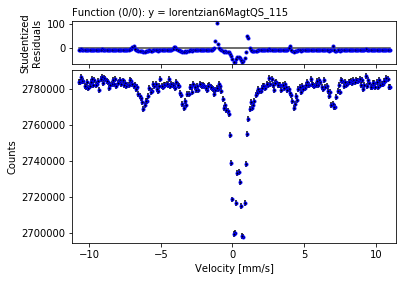

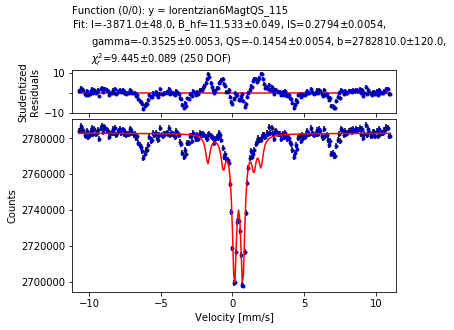


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          ['Velocity [mm/s]']
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          ['Counts']
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 300.178 +/- 0.089, 250.0 DOF)
  I          = -10000.0
  B_hf       = 43.3
  IS         = 0.0
  gamma      = 0.1
  QS         = 0.03
  b          = 2800000.0

FIT RES

In [394]:
#trying to fit ferric floride (this run was at very short distance)
#doesn't seem to work, Q: what are the peak intensity relations?
data = np.loadtxt(".//data//FFloride_Jan15_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])

dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]

my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Velocity [mm/s]" , ylabel = "Counts")
# help(s.data.fitter)
guess = 'I=-1e4, B_hf=43.3, IS=0, gamma=.1, QS=0.03, b=2.8e6'
# my_fitter.set_functions(f=lorentzian6Magt_113, p=guess)
my_fitter.set_functions(f=lorentzian6MagtQS_115, p=guess)


my_fitter.set_data(xdata=velocities, ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
# print(my_fitter.get_fit_results())

# resultsLS = getFits_lor(my_fitter, 0)

## Temperture scaling
Yttrium orthoferrite  
Looking for Neel temperature

In [322]:
'''
data - data loaded from np.loadtxt
guess - string of guesses of parameters for lor fit
peak - number of peaks to fit (currently either 2 or 6)
'''
def fitYtt(data, guess, peaks):
    data = np.transpose(data)
    data[1][511] = (data[1][510] + data[1][0])/2
    ydataerr = np.sqrt(data[1])

    dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]
    
    velocities = chan_to_velo(dataL[0], m, b)

    my_fitter = s.data.fitter()
    my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
                  , plot_guess=False, fpoints=None, xlabel = "Velocity [mm/s]" , ylabel = "Counts")

    if peaks == 6: 
    #6 fit
        my_fitter.set_functions(f=lorentzian6const, p=guess)

        my_fitter.set_data(xdata=velocities, ydata=dataL[1], eydata=dataL[2])
        my_fitter.fit()
        # print(my_fitter.get_fit_results())

        results = [getFits_lor(my_fitter, 0), getFits_lor(my_fitter, 1), getFits_lor(my_fitter, 2)]
    if peaks == 2: 
    #4 fit
        my_fitter.set_functions(f=lorentzian2Const, p=guess)

        my_fitter.set_data(xdata=velocities, ydata=dataL[1], eydata=dataL[2])
        my_fitter.fit()
        # print(my_fitter.get_fit_results())

        results = [getFits_lor(my_fitter, 0)]
    
    return results

In [323]:
#Yttrium orthoferrite
data = np.loadtxt(".//data//Y_ortho_T256_Jan20_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])

dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]

tempPoints = [[],[], []]

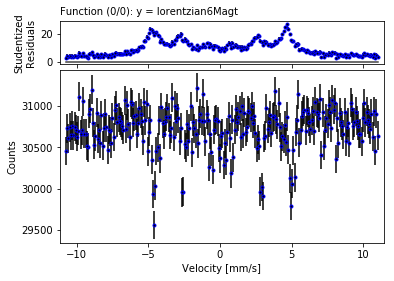

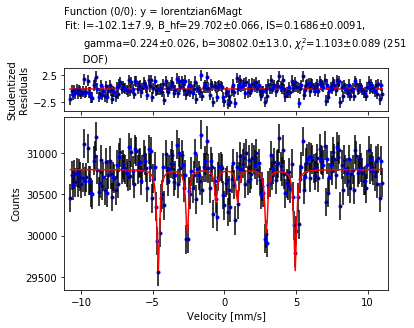


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          ['Velocity [mm/s]']
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          ['Counts']
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 126.129 +/- 0.089, 251.0 DOF)
  I          = -300.0
  B_hf       = 29.0
  IS         = 0.0
  gamma      = 1.0
  b          = 30000.0

FIT RESULTS (reduced chi^2 = 1.

In [347]:
# should be data taken at 297 (but could be wrong)
data = np.loadtxt(".//data//Y_ortho_T256_Jan20_full.Asc", skiprows=0)
data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])

dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]

velocities = chan_to_velo(dataL[0], m, b)

guess = 'I=-300, B_hf=29, IS=0, gamma=1, b=3e4'

my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Velocity [mm/s]" , ylabel = "Counts")

my_fitter.set_functions(f=lorentzian6Magt, p=guess)

my_fitter.set_data(xdata=velocities, ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
# print(my_fitter.get_fit_results())

# results = [getFits_lor(my_fitter, 0), getFits_lor(my_fitter, 1), getFits_lor(my_fitter, 2)]

### Fitting Data from malfunctioning oven

In [327]:
# data_T256 = np.loadtxt(".//data//Y_ortho_T256_Jan20_full.Asc", skiprows=0)
# guess_T256 = 'center=0, dist=4.8, gamma=1, A=-1500, center_2=0, dist_2=2.7, gamma_2=2, A_2=-1300, center_3=0, dist_3=1.1, gamma_3=0.7, A_3=-1000, b=3e4'

# fit_T256 = fitYtt(data_T256, guess_T256, 6)
# # print(fit_T256[2])

# tempPoints[0].append(256)
# tempPoints[1].append(fit_T256[2][1][0])
# tempPoints[2].append(fit_T367[2][1][1])

In [328]:
# data_T358 = np.loadtxt(".//data//Y_ortho_T358_Jan21_full.Asc", skiprows=0)

# guess_T358 = 'center=0, dist=0.1, gamma=1, A=3e4, b=4e5'
# fit_T358 = fitYtt(data_T358, guess_T358, 2)

# tempPoints[0].append(358)
# tempPoints[1].append(fit_T358[0][1][0])
# tempPoints[2].append(fit_T367[0][1][1])

In [329]:
# data_T365 = np.loadtxt(".//data//Y_ortho_T365_Jan21_full.Asc", skiprows=0)
# guess_T365 = 'center=0, dist=0.1, gamma=1, A=3e4, b=4e6'

# fit_T365 = fitYtt(data_T365, guess_T365, 2)
# tempPoints[0].append(365)
# tempPoints[1].append(fit_T365[0][1][0])
# tempPoints[2].append(fit_T367[0][1][1])

In [330]:
# data_T367 = np.loadtxt(".//data//Y_ortho_T367_Jan22_full.Asc", skiprows=0)
# guess_T367 = 'center=0, dist=0.1, gamma=0.1, A=3e4, b=4e5'

# fit_T367 = fitYtt(data_T367, guess_T367, 2)
# tempPoints[0].append(367)
# tempPoints[1].append(fit_T367[0][1][0])
# tempPoints[2].append(fit_T367[0][1][1])

In [331]:
# data_T309 = np.loadtxt(".//data//Y_ortho_T309_Jan22_full.Asc", skiprows=0)
# guess_T309 = 'center=0, dist=0.1, gamma=0.1, A=3e, b=45e4'

# fit_T309 = fitYtt(data_T309, guess_T309, 2)
# tempPoints[0].append(309)
# tempPoints[1].append(fit_T309[0][1][0])
# tempPoints[2].append(fit_T309[0][1][1])

In [332]:
# #distance of calibration outside peaks
# cal = [5.31149, 0.00055]
# err = [np.abs(i) for i in tempPoints[2]]

# plt.errorbar(tempPoints[0], np.abs(tempPoints[1]), yerr=0, linestyle=" ", marker="o")
# # plt.axhline(cal[0], color='g')

# # tempPoints[2]

# plt.grid()
# plt.ylabel('Dist [mm/sec]')
# plt.xlabel('Temp')

# plt.show

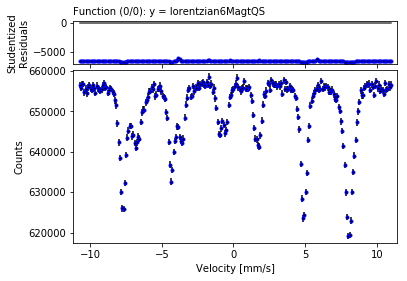

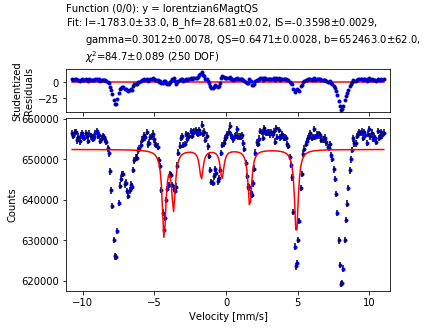


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          ['Velocity [mm/s]']
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          ['Counts']
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 44867558.64 +/- 0.089, 250.0 DOF)
  I          = -30000.0
  B_hf       = 30.0
  IS         = 0.0
  gamma      = 0.1
  QS         = 1.0
  b          = 6000000.0

FIT 

In [346]:
# Magnetite
#QS we think, need added fitter
data = np.loadtxt(".//data//Magnetite_Jan23_full.Asc", skiprows=0)
data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])

dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]

velocities = chan_to_velo(dataL[0], m, b)

guess = 'I=-3e4, B_hf=30, IS=0, gamma=0.1, QS=1.0, b=6e6'

my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Velocity [mm/s]" , ylabel = "Counts")

my_fitter.set_functions(f=lorentzian6MagtQS, p=guess)

my_fitter.set_data(xdata=velocities, ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
# print(my_fitter.get_fit_results())

# results = [getFits_lor(my_fitter, 0), getFits_lor(my_fitter, 1), getFits_lor(my_fitter, 2)]

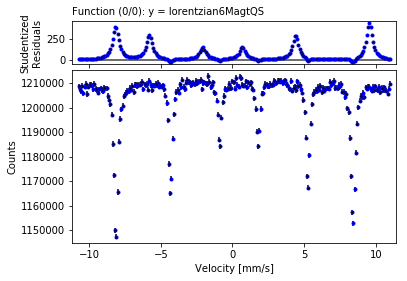

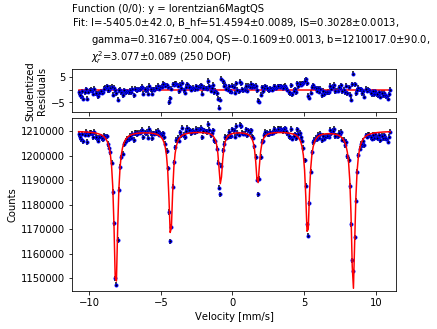


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          ['Velocity [mm/s]']
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          ['Counts']
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 10551.985 +/- 0.089, 250.0 DOF)
  I          = -40000.0
  B_hf       = 55.0
  IS         = 0.0
  gamma      = 0.5
  QS         = 0.7
  b          = 1210000.0

FIT RE

In [412]:
# Hematite
# small QS seen
data = np.loadtxt(".//data//Hematite_Jan24_full.Asc", skiprows=0)
data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])
dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]

guess = 'I=-4e4, B_hf=55, IS=0, gamma=.5, QS=.7, b=1.21e6'

my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Velocity [mm/s]" , ylabel = "Counts")

my_fitter.set_functions(f=lorentzian6MagtQS, p=guess)

my_fitter.set_data(xdata=velocities, ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
